**Robot *Trading* en Python**

# **1.Configuración del ambiente**

Para empezar, puedes utilizar un entorno virtual como Google Colaboratory, o si deseas, puedes usar el editor Python de tu preferencia, sólo asegúrate de tener Python 3.x instalado en tu computadora. También necesitarás instalar algunas librerías de Python que son esenciales para este proyecto, como Pandas, Numpy, Matplotlib, etc.

### **Variables globales**


1. df_bitcoin: Este variable tiene el dataframe de los precios historicos del bitcoin
2. precio_actual: precio actual del bitcoin
3. tendencia: si el precio del bitcoin es alta o baja
4. media_bitcoin: promedio de la variable Close
5. algoritmo_decision: tomara 3 variables Esperar, Comprar o Vender



In [1]:
#Importando Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
from IPython.display import clear_output
import time


In [2]:
# Version de Python
version = !python -V
print('La versión de python que estamos usando es: '+str(version))


La versión de python que estamos usando es: ['Python 3.10.11']


# **2.Obtención de datos**
Necesitarás acceder a una API que proporcione datos históricos de precios de Bitcoin en formato JSON. Por otro lado, necesitarás realizar Web Scraping en un site de noticias para obtener el precio actual y algunos indicadores de tendencias del Bitcoin.

### **2.1 Precios históricos del Bitcoin**
Crea una funcion *importar_base_bitcoin()*, dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Utiliza la biblioteca *yfinance* de Python para extraer el histórico de precios del Bitcoin en dólares BTC-USD, deberás extraer el histórico de los últimos 7 días en intervalos de 5 minutos, este histórico deberás guardarlo en el dataframe df_bitcoin.

In [3]:
def importar_base_bitcoin():
  global df_bitcoin
  df = yf.download(
  tickers = "BTC-USD",
  period = "7d",
  interval = "5m"
  )
  df_bitcoin = pd.DataFrame(df)
  return df_bitcoin



In [4]:
importar_base_bitcoin()
df_bitcoin

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-05-16 00:00:00+00:00,27171.513672,27180.341797,27171.226562,27171.226562,27171.226562,0
2023-05-16 00:05:00+00:00,27170.492188,27202.392578,27170.492188,27202.392578,27202.392578,11909120
2023-05-16 00:10:00+00:00,27221.753906,27222.830078,27208.285156,27222.830078,27222.830078,25136128
2023-05-16 00:15:00+00:00,27221.365234,27270.158203,27221.365234,27270.158203,27270.158203,0
2023-05-16 00:20:00+00:00,27264.189453,27287.683594,27264.189453,27287.683594,27287.683594,0
...,...,...,...,...,...,...
2023-05-22 19:55:00+00:00,26852.705078,26852.705078,26846.269531,26849.121094,26849.121094,15861760
2023-05-22 20:00:00+00:00,26857.931641,26868.896484,26857.931641,26860.210938,26860.210938,1818624
2023-05-22 20:05:00+00:00,26860.960938,26862.822266,26858.150391,26862.263672,26862.263672,0


### **2.2 Indicadores de Tendencia**
Crea una funcion extraer_tendencias(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Utilizando la biblioteca BeautifulSoup deberás realizar Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora 1h % . El precio deberás convertirlo a float y guardarlo en la variable llamada precio_actual.  Ahora, en la variable tendencia guarda el valor de 'baja'si la variación del precio es negativa, sino, guarda el valor de 'alta'.

In [29]:
def extraer_tendencias():
  global precio_actual,variacion_1h,tendencia
  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}
  url = "https://coinmarketcap.com/"
  respuesta = requests.get(url,headers = headers)
  s=BeautifulSoup(respuesta.content,features="lxml")
  precio_actual = float(s.find('a', {'href':"/currencies/bitcoin/markets/"}).find('span').getText().replace("$","").replace(",",""))
  variacion_1h = float(s.find('span', {'class':['sc-97d6d2ca-0 cYiHal','sc-97d6d2ca-0 bQjSqS']}).getText().replace("%",""))
  tendencia = str(s.find('span', {'class':['sc-97d6d2ca-0 cYiHal','sc-97d6d2ca-0 bQjSqS']}))
  tendencia=tendencia[59:63] 
  if tendencia == 'down':
    tendencia='Baja'
  else:
    tendencia='Alta'
  return[precio_actual,variacion_1h,tendencia]  

extraer_tendencias()



[26902.71, 0.15, 'Alta']

# **3.Limpieza de Datos**
Crea una funcion *limpieza_datos()*, dentro de ella, define nuevamente las variables globales.

crea una copia de la base df_bitcoin para que realices la limpieza en esta nueva base(df_bitcoin_limpio), sin modificar la base original, además es importante entender su contenido:

Datetime: Es el índice del dataframe, y contiene la fecha y hora del intervalo seleccionado, no puede estar duplicado.

Open: Contiene el precio del Bitcoin al inicio del intervalo.

High: Contiene el precio más alto del Bitcoin durante el intervalo.

Low: Contiene el precio más bajo del Bitcoin durante el intervalo.

Close: Contiene el precio del Bitcoin al final del intervalo.

Volume: Contiene el total de transacciones hechas durante el intervalo.

Para la limpieza utilizaremos los atributos Datetime, Close y Volume.

Analiza la base df_bitcoin_limpio, identifica duplicados en el índice y trátalos para quedarte con sólo índices únicos.

Luego busca por valores nulos en la columna Close y trátalos.

Verifica que todos los registros de la base tengan un Volume de transacción mayor a 0, caso contrário, elimínalos.

Deberás identificar y eliminar los outliers en el precio del Bitcoin, columna Close, utiliza un gráfico de boxplot para identificarlos.

Filtra o selecciona únicamente los registros cuyo precio(Close) se encuentren entre el 1er cuartil(Q1) y el 3er cuartil(Q3) del boxplot.

Finalmente, calcula el precio promedio(Close) de esta selección y guárdala en la variable media_bitcoin.

### **3.1 Limpieza columnas Close y Volume**

In [30]:
df=importar_base_bitcoin()
df_bitcoin_limpio = df.copy()

[*********************100%***********************]  1 of 1 completed


In [31]:
def limpieza_datos():
  global df_bitcoin_limpio,media_bitcoin

  #Se obtiene de la base dos columnas Close y Volume
  df_bitcoin_limpio = df_bitcoin_limpio[['Close','Volume']]
  
  #Validamos si hay duplicados en nuestra columna Datetime, si es asi eliminamos dichas filas
  duplicated_index = df_bitcoin_limpio.index.duplicated()
  df_bitcoin_limpio=df_bitcoin_limpio[~duplicated_index]
  
  #Validamos si en la columna Volume hay nulos si es el caso se reemplaza por 0 y 
  #despues, los registros que son 0 se eliminan de la base
  df_bitcoin_limpio=df_bitcoin_limpio.fillna({'Volume': 0})
  df_volume = df_bitcoin_limpio['Volume'] > 0 
  df_bitcoin_limpio = df_bitcoin_limpio[df_volume]
  
  #Validamos si en la columna Close tiene datos nulos o 0, en este caso los reemplazamos por el promedio de la columna
  df_bitcoin_limpio=df_bitcoin_limpio.fillna({'Close': 0})
  promedio = df_bitcoin_limpio['Close'].sum()/len(df_bitcoin_limpio['Close'] != 0)
  df_bitcoin_limpio.loc[(df_bitcoin_limpio.Close == 0), 'Close'] = promedio
  
  #Eliminacion de outliers
  q1 = df_bitcoin_limpio['Close'].quantile(0.25)
  q3 = df_bitcoin_limpio['Close'].quantile(0.75)
  box = ((df_bitcoin_limpio['Close'] >= q1) & (df_bitcoin_limpio['Close'] <= q3))
  df_bitcoin_limpio=df_bitcoin_limpio[box]
  media_bitcoin = df_bitcoin_limpio['Close'].mean()
  return media_bitcoin



La media de la base es: 26963.436815036323


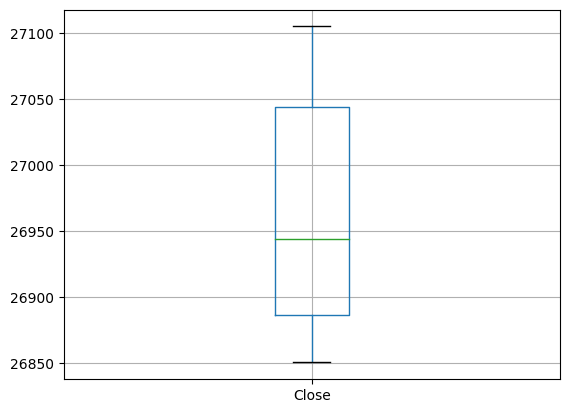

In [32]:
limpieza_datos()
df_bitcoin_limpio.boxplot(['Close'])
print(f'La media de la base es: {media_bitcoin}')

# **4.Tomar Decisiones**
Crea una funcion tomar_decisiones(), dentro de ella, define nuevamente las variables globales y escribe tu código:

Rellena la variable algoritmo_decision con el valor resultante del siguiente criterio de decisión:

Si el precio actual es mayor/igual que el precio promedio y la tendencia es de baja, entonces guarda el valor ‘Vender’.

Si el precio actual es menor que el precio promedio y la tendencia es de alta, entonces guarda el valor ‘Comprar’.

Si ninguna de las 2 condiciones anteriores se cumple, entonces guarda el valor ''.

In [33]:
def tomar_decisiones():
  global df_bitcoin,precio_actual,variacion_1h,tendencia,media_bitcoin
  precio_actual = extraer_tendencias()[0]
  tendencia = extraer_tendencias()[2]
  if precio_actual>=media_bitcoin and tendencia == 'Baja':
    algoritmo_decision = 'Vender'
  elif precio_actual < media_bitcoin and tendencia != 'Baja':
    algoritmo_decision = 'Comprar'
  else:
    algoritmo_decision = 'Esperar'
  return algoritmo_decision

In [34]:
algoritmo_decision=tomar_decisiones()
print('Precio Promedio: ',media_bitcoin)
print('Precio Actual: ',precio_actual)
print('Tendencia: ',tendencia)
print('Decision del algoritmo: ',algoritmo_decision)

Precio Promedio:  26963.436815036323
Precio Actual:  26902.71
Tendencia:  Alta
Decision del algoritmo:  Comprar


# **5. Visualizacion**

Crea una funcion visualizacion(), dentro de ella, define nuevamente las variables globales y escribe tu código:

Adiciona una nueva columna (Promedio) al dataframe original df_bitcoiny almacena el valor de nuestra variable media_bitcoin.

Configura el tamaño del gráfico en una proporción de 16x5.

Adiciona un título al gráfico.

Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Close de la base df_bitcoin.

Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Promedio de la base df_bitcoin.

Usando el método annotate()muestra un mensaje dentro del gráfico con la decisión calculada del algoritmo.

Finalmente, usando el método show()muestra en pantalla el gráfico que acabamos de configurar.

In [35]:
def visualizacion():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision,df_bitcoin_limpio
  #Adicionamos la nueva columna Promedio
  df_bitcoin['Promedio'] = media_bitcoin
  #Modificamos el tamaño del grafico
  plt.figure(figsize=(16,5))
  #Trazamos la linea para los datos de la columna Close
  plt.plot(df_bitcoin.index,df_bitcoin['Close'])
  #Trazamos la linea para los datos de la columna Promedio
  plt.plot(df_bitcoin.index,df_bitcoin['Promedio'])
  plt.xlabel('Fecha')
  plt.ylabel('Precio')
  plt.annotate(f'Decisión: {algoritmo_decision}', xy=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]),xytext=(-130, 80), textcoords='offset points',
  arrowprops=dict(arrowstyle='->'),fontsize=14,color='red')
  #Agregamos el titulo 
  plt.title('Robot Trading')
  # Mostrar gráfico
  plt.show()

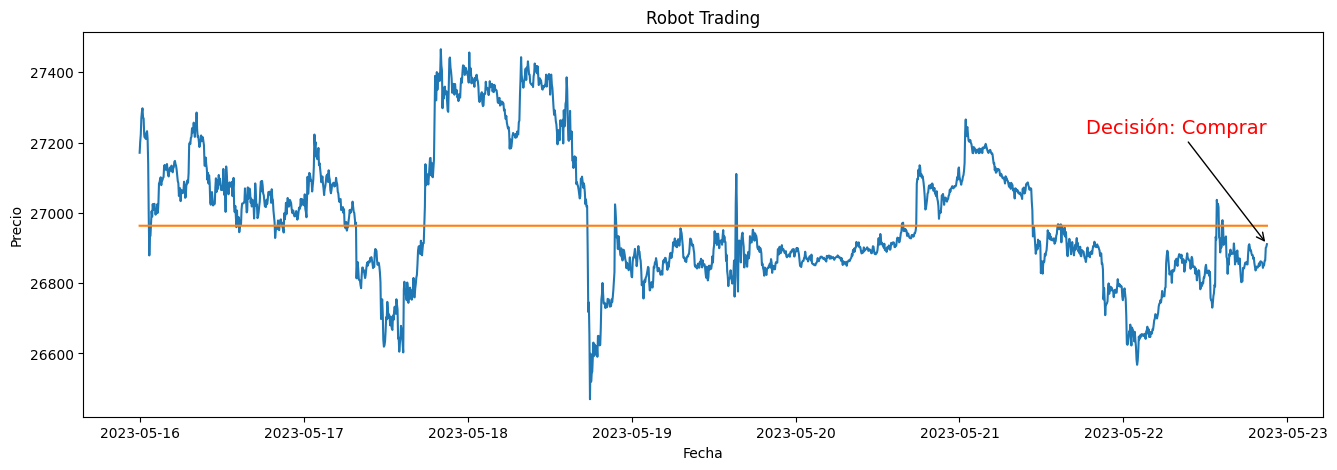

In [36]:
visualizacion()

# **6. Automatizacion**

[*********************100%***********************]  1 of 1 completed


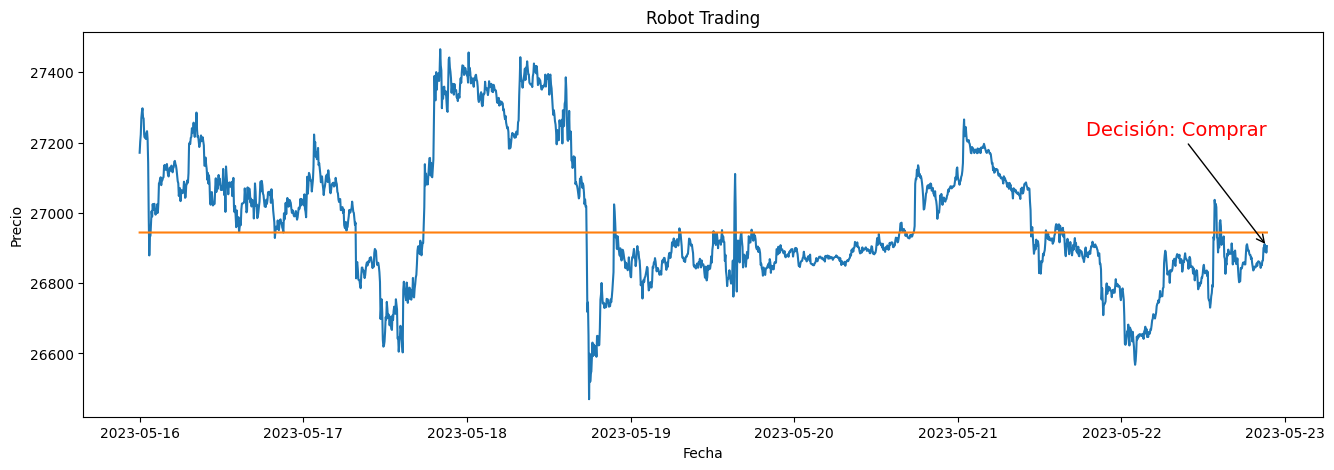

In [ ]:
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)